# BITSTAMP BTC/USD market

### Packages

In [2]:
# External packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime 


# Internal packages
import sys
sys.path.append('../Code/TS_helpers/')
sys.path.append('../Code/')

data_dir = '../../Data/Coins/BTC_USD/bitcoin-historical-data/'

from dates_kaggle1min import make_all_time_indexes, make_integer_time_index
from util import print_rmse, exp_smooth
from financial_ts_visualizers import summarise_BTC1min

class Struct(object): pass




## Tsplot
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
daily = pd.read_pickle('./daily_simple_aggs.pkl')

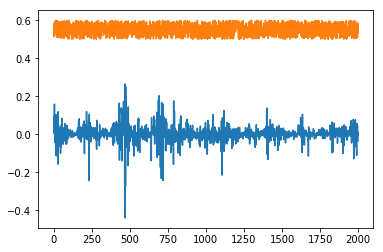

In [13]:
daily_df = pd.DataFrame({
    
    'vol_cur': daily.volume_cur,
    'vol_btc': daily.volume_btc,
    
    'close': daily.close,
    'open': daily.open,
    'high': daily.high, 
    'low': daily.low,
    
    'vwa_close': daily.weighted_close,
    'vwa_open': daily.weighted_open,
    'vwa_high': daily.weighted_high,
    'vwa_low': daily.weighted_low,
              
    'vwa_pr': daily.weighted_price,
    
    'lr_vwa_pr': (daily.weighted_price/daily.weighted_price.shift()).apply(np.log),
    
    
    'count_non_na_mins': daily.volume_btc/daily.non_na_minute_counts
              })


days=2000
plt.plot(range(days), daily_df['lr_vwa_pr'][:days])

ran = np.random.random(days)
ran = ran*0.1 +0.5
plt.plot(range(days), ran)

### Add technical indicators

In [4]:
from ta import *

In [5]:
daily_df = add_all_ta_features(df=daily_df, close='close',
                              open='open', high='high', low='low', volume='vol_cur')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ta/trend.py:170: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (dip_mio[i]/trs[i])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ta/trend.py:174: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (din_mio[i]/trs[i])


In [17]:
cols_na = daily_df.isna().sum()[daily_df.isna().mean()>0].index.values
for col in cols_na:
    ave= daily_df[col].mean()
    daily_df[col].fillna(ave, inplace=True)

In [18]:
(daily_df[cols_na].isna().sum() == 0 ).all()

True

In [5]:
daily_df.to_csv('../../Data/Coins/BTC_USD/Daily_aggregated/daily_aggs_tech_indicators.csv')

In [18]:
list(daily_df['lr_vwa_pr'].round(3))

[nan,
 0.093,
 0.02,
 0.054,
 0.004,
 0.159,
 0.057,
 0.032,
 0.018,
 -0.043,
 0.002,
 0.061,
 0.029,
 -0.031,
 -0.09,
 0.104,
 -0.038,
 -0.114,
 0.003,
 0.016,
 0.076,
 -0.071,
 -0.019,
 0.038,
 0.006,
 -0.031,
 -0.015,
 -0.069,
 -0.157,
 0.119,
 0.001,
 0.05,
 0.015,
 0.039,
 -0.005,
 -0.013,
 -0.029,
 -0.052,
 0.018,
 0.008,
 0.012,
 0.017,
 -0.063,
 0.037,
 -0.0,
 -0.1,
 -0.045,
 -0.066,
 0.015,
 -0.065,
 -0.018,
 0.052,
 -0.024,
 0.018,
 0.084,
 0.043,
 -0.027,
 -0.017,
 0.026,
 -0.007,
 -0.016,
 0.011,
 -0.052,
 -0.012,
 0.023,
 0.034,
 0.007,
 0.016,
 -0.022,
 0.013,
 -0.035,
 0.009,
 0.011,
 0.021,
 0.057,
 0.001,
 -0.001,
 0.006,
 -0.01,
 -0.05,
 -0.038,
 0.009,
 -0.012,
 -0.051,
 0.037,
 -0.047,
 -0.004,
 0.048,
 0.014,
 -0.003,
 0.003,
 0.011,
 -0.024,
 0.027,
 0.009,
 -0.011,
 0.01,
 -0.017,
 -0.018,
 -0.009,
 0.005,
 0.008,
 0.012,
 -0.005,
 0.01,
 0.016,
 -0.003,
 0.0,
 0.005,
 0.024,
 0.002,
 0.011,
 0.017,
 -0.009,
 -0.013,
 -0.012,
 -0.014,
 0.001,
 -0.002,
 -0.01,
 -0

In [11]:
from IPython.display import Audio
Audio(list(daily_df['lr_vwa_pr'].values+0.5)*100, rate=20000)

## Overview

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


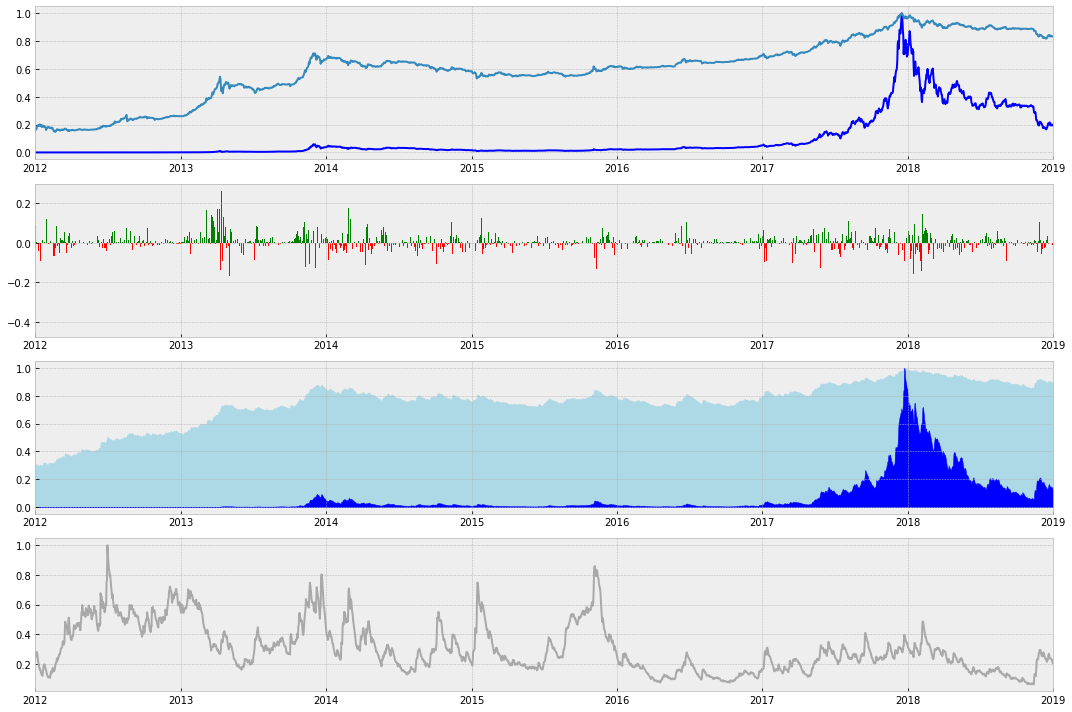

In [8]:
time_first = daily_df.index[0]
time_last = daily_df.index[-1]

summarise_BTC1min(df=daily_df, 
                  
                  col_val='vwa_pr', 
                  col_volume='vol_cur',
                  
                  time_first = time_first,
                  time_last = '2019-01-01',
                  
                  cols_smooth=['vol_cur', 
                               'count_non_na_mins'])

### Train test split

From the plot we make decisions for the train test validation splits

### Split the Data

In [14]:
train_first_day = pd.to_datetime('2014-01-01')
val_first_day = pd.to_datetime('2018-01-01')
test_first_day = pd.to_datetime('2019-01-01')


train_mask = (daily_df.index >= train_first_day) & (daily_df.index < val_first_day)
val_mask = (daily_df.index >= val_first_day) & (daily_df.index < test_first_day)
develop_mask = train_mask | val_mask
test_mask = (daily_df.index >= test_first_day)

masks = {}
masks['tr'] = train_mask
masks['val'] = val_mask
masks['dev'] = develop_mask
masks['te'] = test_mask

#### Genetic Algorithm to search for input features and Reservoir Parameters

In [445]:
from importlib import reload
import GA

reload(GA)
from GA import esn, evolution

In [447]:
evol = evolution(df=daily_df, 
                masks=masks, 
                population_size=50, 
                indiviudal_size=daily_df.shape[1], verbose=True)
evol.evolve(generations=5000)


 Genereation:  1
Best individuals score:  8.795098702821889

 Genereation:  2
Best individuals score:  8.795098702821889

 Genereation:  3
Best individuals score:  8.795098702821889

 Genereation:  4
Best individuals score:  8.795098702821889

 Genereation:  5
Best individuals score:  8.795098702821889

 Genereation:  6
Best individuals score:  8.795098702821889

 Genereation:  7
Best individuals score:  8.795098702821889

 Genereation:  8
Best individuals score:  8.795098702821889

 Genereation:  9
Best individuals score:  8.795098702821889

 Genereation:  10
Best individuals score:  8.848399003640177

 Genereation:  11
Best individuals score:  8.848399003640177

 Genereation:  12
Best individuals score:  8.848399003640177

 Genereation:  13
Best individuals score:  8.848399003640177

 Genereation:  14
Best individuals score:  8.848399003640177

 Genereation:  15
Best individuals score:  8.848399003640177

 Genereation:  16
Best individuals score:  8.876979978077951

 Genereation:  1

Best individuals score:  9.054203919631702

 Genereation:  134
Best individuals score:  9.054203919631702

 Genereation:  135
Best individuals score:  9.054203919631702

 Genereation:  136
Best individuals score:  9.054203919631702

 Genereation:  137
Best individuals score:  9.054203919631702

 Genereation:  138
Best individuals score:  9.054203919631702

 Genereation:  139
Best individuals score:  9.054203919631702

 Genereation:  140
Best individuals score:  9.054203919631702

 Genereation:  141
Best individuals score:  9.054203919631702

 Genereation:  142
Best individuals score:  9.054203919631702

 Genereation:  143
Best individuals score:  9.054203919631702

 Genereation:  144
Best individuals score:  9.054203919631702

 Genereation:  145
Best individuals score:  9.054203919631702

 Genereation:  146
Best individuals score:  9.054203919631702

 Genereation:  147
Best individuals score:  9.054203919631702

 Genereation:  148
Best individuals score:  9.054203919631702

 Genereatio

Best individuals score:  9.054203919631702

 Genereation:  265
Best individuals score:  9.054203919631702

 Genereation:  266
Best individuals score:  9.054203919631702

 Genereation:  267
Best individuals score:  9.054203919631702

 Genereation:  268
Best individuals score:  9.054203919631702

 Genereation:  269
Best individuals score:  9.054203919631702

 Genereation:  270
Best individuals score:  9.054203919631702

 Genereation:  271
Best individuals score:  9.054203919631702

 Genereation:  272
Best individuals score:  9.054203919631702

 Genereation:  273
Best individuals score:  9.054203919631702

 Genereation:  274
Best individuals score:  9.054203919631702

 Genereation:  275
Best individuals score:  9.054203919631702

 Genereation:  276
Best individuals score:  9.054203919631702

 Genereation:  277
Best individuals score:  9.054203919631702

 Genereation:  278
Best individuals score:  9.054203919631702

 Genereation:  279
Best individuals score:  9.054203919631702

 Genereatio

Best individuals score:  9.056481219760833

 Genereation:  396
Best individuals score:  9.056481219760833

 Genereation:  397
Best individuals score:  9.056481219760833

 Genereation:  398
Best individuals score:  9.056481219760833

 Genereation:  399
Best individuals score:  9.056481219760833

 Genereation:  400
Best individuals score:  9.056481219760833

 Genereation:  401
Best individuals score:  9.056481219760833

 Genereation:  402
Best individuals score:  9.056481219760833

 Genereation:  403
Best individuals score:  9.056481219760833

 Genereation:  404
Best individuals score:  9.056481219760833

 Genereation:  405
Best individuals score:  9.056481219760833

 Genereation:  406
Best individuals score:  9.056481219760833

 Genereation:  407
Best individuals score:  9.056481219760833

 Genereation:  408
Best individuals score:  9.056481219760833

 Genereation:  409
Best individuals score:  9.056481219760833

 Genereation:  410
Best individuals score:  9.056481219760833

 Genereatio

Best individuals score:  9.056481219760833

 Genereation:  527
Best individuals score:  9.056481219760833

 Genereation:  528
Best individuals score:  9.056481219760833

 Genereation:  529
Best individuals score:  9.056481219760833

 Genereation:  530
Best individuals score:  9.056481219760833

 Genereation:  531
Best individuals score:  9.056481219760833

 Genereation:  532
Best individuals score:  9.056481219760833

 Genereation:  533
Best individuals score:  9.056481219760833

 Genereation:  534
Best individuals score:  9.056481219760833

 Genereation:  535
Best individuals score:  9.056481219760833

 Genereation:  536
Best individuals score:  9.056481219760833

 Genereation:  537
Best individuals score:  9.056481219760833

 Genereation:  538
Best individuals score:  9.056481219760833

 Genereation:  539
Best individuals score:  9.056481219760833

 Genereation:  540
Best individuals score:  9.056481219760833

 Genereation:  541
Best individuals score:  9.056481219760833

 Genereatio

Best individuals score:  9.056481219760833

 Genereation:  658
Best individuals score:  9.056481219760833

 Genereation:  659
Best individuals score:  9.056481219760833

 Genereation:  660
Best individuals score:  9.056481219760833

 Genereation:  661
Best individuals score:  9.056481219760833

 Genereation:  662
Best individuals score:  9.056481219760833

 Genereation:  663
Best individuals score:  9.056481219760833

 Genereation:  664
Best individuals score:  9.056481219760833

 Genereation:  665
Best individuals score:  9.056481219760833

 Genereation:  666
Best individuals score:  9.056481219760833

 Genereation:  667
Best individuals score:  9.056481219760833

 Genereation:  668
Best individuals score:  9.056481219760833

 Genereation:  669
Best individuals score:  9.056481219760833

 Genereation:  670
Best individuals score:  9.056481219760833

 Genereation:  671
Best individuals score:  9.056481219760833

 Genereation:  672
Best individuals score:  9.056481219760833

 Genereatio

Best individuals score:  9.056481219760833

 Genereation:  789
Best individuals score:  9.056481219760833

 Genereation:  790
Best individuals score:  9.056481219760833

 Genereation:  791
Best individuals score:  9.056481219760833

 Genereation:  792
Best individuals score:  9.056481219760833

 Genereation:  793
Best individuals score:  9.056481219760833

 Genereation:  794
Best individuals score:  9.056481219760833

 Genereation:  795
Best individuals score:  9.056481219760833

 Genereation:  796
Best individuals score:  9.056481219760833

 Genereation:  797
Best individuals score:  9.056481219760833

 Genereation:  798
Best individuals score:  9.056481219760833

 Genereation:  799
Best individuals score:  9.056481219760833

 Genereation:  800
Best individuals score:  9.056481219760833

 Genereation:  801
Best individuals score:  9.056481219760833

 Genereation:  802
Best individuals score:  9.056481219760833

 Genereation:  803
Best individuals score:  9.056481219760833

 Genereatio

Best individuals score:  9.056481219760833

 Genereation:  920
Best individuals score:  9.056481219760833

 Genereation:  921
Best individuals score:  9.056481219760833

 Genereation:  922
Best individuals score:  9.056481219760833

 Genereation:  923
Best individuals score:  9.056481219760833

 Genereation:  924
Best individuals score:  9.056481219760833

 Genereation:  925
Best individuals score:  9.056481219760833

 Genereation:  926
Best individuals score:  9.056481219760833

 Genereation:  927
Best individuals score:  9.056481219760833

 Genereation:  928
Best individuals score:  9.056481219760833

 Genereation:  929
Best individuals score:  9.056481219760833

 Genereation:  930
Best individuals score:  9.056481219760833

 Genereation:  931
Best individuals score:  9.056481219760833

 Genereation:  932
Best individuals score:  9.056481219760833

 Genereation:  933
Best individuals score:  9.056481219760833

 Genereation:  934
Best individuals score:  9.056481219760833

 Genereatio

Best individuals score:  9.056481219760833

 Genereation:  1050
Best individuals score:  9.056481219760833

 Genereation:  1051
Best individuals score:  9.056481219760833

 Genereation:  1052
Best individuals score:  9.056481219760833

 Genereation:  1053
Best individuals score:  9.056481219760833

 Genereation:  1054
Best individuals score:  9.056481219760833

 Genereation:  1055
Best individuals score:  9.056481219760833

 Genereation:  1056
Best individuals score:  9.056481219760833

 Genereation:  1057
Best individuals score:  9.056481219760833

 Genereation:  1058
Best individuals score:  9.056481219760833

 Genereation:  1059
Best individuals score:  9.056481219760833

 Genereation:  1060
Best individuals score:  9.056481219760833

 Genereation:  1061
Best individuals score:  9.056481219760833

 Genereation:  1062
Best individuals score:  9.056481219760833

 Genereation:  1063
Best individuals score:  9.056481219760833

 Genereation:  1064
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  1179
Best individuals score:  9.056481219760833

 Genereation:  1180
Best individuals score:  9.056481219760833

 Genereation:  1181
Best individuals score:  9.056481219760833

 Genereation:  1182
Best individuals score:  9.056481219760833

 Genereation:  1183
Best individuals score:  9.056481219760833

 Genereation:  1184
Best individuals score:  9.056481219760833

 Genereation:  1185
Best individuals score:  9.056481219760833

 Genereation:  1186
Best individuals score:  9.056481219760833

 Genereation:  1187
Best individuals score:  9.056481219760833

 Genereation:  1188
Best individuals score:  9.056481219760833

 Genereation:  1189
Best individuals score:  9.056481219760833

 Genereation:  1190
Best individuals score:  9.056481219760833

 Genereation:  1191
Best individuals score:  9.056481219760833

 Genereation:  1192
Best individuals score:  9.056481219760833

 Genereation:  1193
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  1308
Best individuals score:  9.056481219760833

 Genereation:  1309
Best individuals score:  9.056481219760833

 Genereation:  1310
Best individuals score:  9.056481219760833

 Genereation:  1311
Best individuals score:  9.056481219760833

 Genereation:  1312
Best individuals score:  9.056481219760833

 Genereation:  1313
Best individuals score:  9.056481219760833

 Genereation:  1314
Best individuals score:  9.056481219760833

 Genereation:  1315
Best individuals score:  9.056481219760833

 Genereation:  1316
Best individuals score:  9.056481219760833

 Genereation:  1317
Best individuals score:  9.056481219760833

 Genereation:  1318
Best individuals score:  9.056481219760833

 Genereation:  1319
Best individuals score:  9.056481219760833

 Genereation:  1320
Best individuals score:  9.056481219760833

 Genereation:  1321
Best individuals score:  9.056481219760833

 Genereation:  1322
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  1437
Best individuals score:  9.056481219760833

 Genereation:  1438
Best individuals score:  9.056481219760833

 Genereation:  1439
Best individuals score:  9.056481219760833

 Genereation:  1440
Best individuals score:  9.056481219760833

 Genereation:  1441
Best individuals score:  9.056481219760833

 Genereation:  1442
Best individuals score:  9.056481219760833

 Genereation:  1443
Best individuals score:  9.056481219760833

 Genereation:  1444
Best individuals score:  9.056481219760833

 Genereation:  1445
Best individuals score:  9.056481219760833

 Genereation:  1446
Best individuals score:  9.056481219760833

 Genereation:  1447
Best individuals score:  9.056481219760833

 Genereation:  1448
Best individuals score:  9.056481219760833

 Genereation:  1449
Best individuals score:  9.056481219760833

 Genereation:  1450
Best individuals score:  9.056481219760833

 Genereation:  1451
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  1566
Best individuals score:  9.056481219760833

 Genereation:  1567
Best individuals score:  9.056481219760833

 Genereation:  1568
Best individuals score:  9.056481219760833

 Genereation:  1569
Best individuals score:  9.056481219760833

 Genereation:  1570
Best individuals score:  9.056481219760833

 Genereation:  1571
Best individuals score:  9.056481219760833

 Genereation:  1572
Best individuals score:  9.056481219760833

 Genereation:  1573
Best individuals score:  9.056481219760833

 Genereation:  1574
Best individuals score:  9.056481219760833

 Genereation:  1575
Best individuals score:  9.056481219760833

 Genereation:  1576
Best individuals score:  9.056481219760833

 Genereation:  1577
Best individuals score:  9.056481219760833

 Genereation:  1578
Best individuals score:  9.056481219760833

 Genereation:  1579
Best individuals score:  9.056481219760833

 Genereation:  1580
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  1695
Best individuals score:  9.056481219760833

 Genereation:  1696
Best individuals score:  9.056481219760833

 Genereation:  1697
Best individuals score:  9.056481219760833

 Genereation:  1698
Best individuals score:  9.056481219760833

 Genereation:  1699
Best individuals score:  9.056481219760833

 Genereation:  1700
Best individuals score:  9.056481219760833

 Genereation:  1701
Best individuals score:  9.056481219760833

 Genereation:  1702
Best individuals score:  9.056481219760833

 Genereation:  1703
Best individuals score:  9.056481219760833

 Genereation:  1704
Best individuals score:  9.056481219760833

 Genereation:  1705
Best individuals score:  9.056481219760833

 Genereation:  1706
Best individuals score:  9.056481219760833

 Genereation:  1707
Best individuals score:  9.056481219760833

 Genereation:  1708
Best individuals score:  9.056481219760833

 Genereation:  1709
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  1824
Best individuals score:  9.056481219760833

 Genereation:  1825
Best individuals score:  9.056481219760833

 Genereation:  1826
Best individuals score:  9.056481219760833

 Genereation:  1827
Best individuals score:  9.056481219760833

 Genereation:  1828
Best individuals score:  9.056481219760833

 Genereation:  1829
Best individuals score:  9.056481219760833

 Genereation:  1830
Best individuals score:  9.056481219760833

 Genereation:  1831
Best individuals score:  9.056481219760833

 Genereation:  1832
Best individuals score:  9.056481219760833

 Genereation:  1833
Best individuals score:  9.056481219760833

 Genereation:  1834
Best individuals score:  9.056481219760833

 Genereation:  1835
Best individuals score:  9.056481219760833

 Genereation:  1836
Best individuals score:  9.056481219760833

 Genereation:  1837
Best individuals score:  9.056481219760833

 Genereation:  1838
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  1953
Best individuals score:  9.056481219760833

 Genereation:  1954
Best individuals score:  9.056481219760833

 Genereation:  1955
Best individuals score:  9.056481219760833

 Genereation:  1956
Best individuals score:  9.056481219760833

 Genereation:  1957
Best individuals score:  9.056481219760833

 Genereation:  1958
Best individuals score:  9.056481219760833

 Genereation:  1959
Best individuals score:  9.056481219760833

 Genereation:  1960
Best individuals score:  9.056481219760833

 Genereation:  1961
Best individuals score:  9.056481219760833

 Genereation:  1962
Best individuals score:  9.056481219760833

 Genereation:  1963
Best individuals score:  9.056481219760833

 Genereation:  1964
Best individuals score:  9.056481219760833

 Genereation:  1965
Best individuals score:  9.056481219760833

 Genereation:  1966
Best individuals score:  9.056481219760833

 Genereation:  1967
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  2082
Best individuals score:  9.056481219760833

 Genereation:  2083
Best individuals score:  9.056481219760833

 Genereation:  2084
Best individuals score:  9.056481219760833

 Genereation:  2085
Best individuals score:  9.056481219760833

 Genereation:  2086
Best individuals score:  9.056481219760833

 Genereation:  2087
Best individuals score:  9.056481219760833

 Genereation:  2088
Best individuals score:  9.056481219760833

 Genereation:  2089
Best individuals score:  9.056481219760833

 Genereation:  2090
Best individuals score:  9.056481219760833

 Genereation:  2091
Best individuals score:  9.056481219760833

 Genereation:  2092
Best individuals score:  9.056481219760833

 Genereation:  2093
Best individuals score:  9.056481219760833

 Genereation:  2094
Best individuals score:  9.056481219760833

 Genereation:  2095
Best individuals score:  9.056481219760833

 Genereation:  2096
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  2211
Best individuals score:  9.056481219760833

 Genereation:  2212
Best individuals score:  9.056481219760833

 Genereation:  2213
Best individuals score:  9.056481219760833

 Genereation:  2214
Best individuals score:  9.056481219760833

 Genereation:  2215
Best individuals score:  9.056481219760833

 Genereation:  2216
Best individuals score:  9.056481219760833

 Genereation:  2217
Best individuals score:  9.056481219760833

 Genereation:  2218
Best individuals score:  9.056481219760833

 Genereation:  2219
Best individuals score:  9.056481219760833

 Genereation:  2220
Best individuals score:  9.056481219760833

 Genereation:  2221
Best individuals score:  9.056481219760833

 Genereation:  2222
Best individuals score:  9.056481219760833

 Genereation:  2223
Best individuals score:  9.056481219760833

 Genereation:  2224
Best individuals score:  9.056481219760833

 Genereation:  2225
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  2340
Best individuals score:  9.056481219760833

 Genereation:  2341
Best individuals score:  9.056481219760833

 Genereation:  2342
Best individuals score:  9.056481219760833

 Genereation:  2343
Best individuals score:  9.056481219760833

 Genereation:  2344
Best individuals score:  9.056481219760833

 Genereation:  2345
Best individuals score:  9.056481219760833

 Genereation:  2346
Best individuals score:  9.056481219760833

 Genereation:  2347
Best individuals score:  9.056481219760833

 Genereation:  2348
Best individuals score:  9.056481219760833

 Genereation:  2349
Best individuals score:  9.056481219760833

 Genereation:  2350
Best individuals score:  9.056481219760833

 Genereation:  2351
Best individuals score:  9.056481219760833

 Genereation:  2352
Best individuals score:  9.056481219760833

 Genereation:  2353
Best individuals score:  9.056481219760833

 Genereation:  2354
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  2469
Best individuals score:  9.056481219760833

 Genereation:  2470
Best individuals score:  9.056481219760833

 Genereation:  2471
Best individuals score:  9.056481219760833

 Genereation:  2472
Best individuals score:  9.056481219760833

 Genereation:  2473
Best individuals score:  9.056481219760833

 Genereation:  2474
Best individuals score:  9.056481219760833

 Genereation:  2475
Best individuals score:  9.056481219760833

 Genereation:  2476
Best individuals score:  9.056481219760833

 Genereation:  2477
Best individuals score:  9.056481219760833

 Genereation:  2478
Best individuals score:  9.056481219760833

 Genereation:  2479
Best individuals score:  9.056481219760833

 Genereation:  2480
Best individuals score:  9.056481219760833

 Genereation:  2481
Best individuals score:  9.056481219760833

 Genereation:  2482
Best individuals score:  9.056481219760833

 Genereation:  2483
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  2598
Best individuals score:  9.056481219760833

 Genereation:  2599
Best individuals score:  9.056481219760833

 Genereation:  2600
Best individuals score:  9.056481219760833

 Genereation:  2601
Best individuals score:  9.056481219760833

 Genereation:  2602
Best individuals score:  9.056481219760833

 Genereation:  2603
Best individuals score:  9.056481219760833

 Genereation:  2604
Best individuals score:  9.056481219760833

 Genereation:  2605
Best individuals score:  9.056481219760833

 Genereation:  2606
Best individuals score:  9.056481219760833

 Genereation:  2607
Best individuals score:  9.056481219760833

 Genereation:  2608
Best individuals score:  9.056481219760833

 Genereation:  2609
Best individuals score:  9.056481219760833

 Genereation:  2610
Best individuals score:  9.056481219760833

 Genereation:  2611
Best individuals score:  9.056481219760833

 Genereation:  2612
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  2727
Best individuals score:  9.056481219760833

 Genereation:  2728
Best individuals score:  9.056481219760833

 Genereation:  2729
Best individuals score:  9.056481219760833

 Genereation:  2730
Best individuals score:  9.056481219760833

 Genereation:  2731
Best individuals score:  9.056481219760833

 Genereation:  2732
Best individuals score:  9.056481219760833

 Genereation:  2733
Best individuals score:  9.056481219760833

 Genereation:  2734
Best individuals score:  9.056481219760833

 Genereation:  2735
Best individuals score:  9.056481219760833

 Genereation:  2736
Best individuals score:  9.056481219760833

 Genereation:  2737
Best individuals score:  9.056481219760833

 Genereation:  2738
Best individuals score:  9.056481219760833

 Genereation:  2739
Best individuals score:  9.056481219760833

 Genereation:  2740
Best individuals score:  9.056481219760833

 Genereation:  2741
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  2856
Best individuals score:  9.056481219760833

 Genereation:  2857
Best individuals score:  9.056481219760833

 Genereation:  2858
Best individuals score:  9.056481219760833

 Genereation:  2859
Best individuals score:  9.056481219760833

 Genereation:  2860
Best individuals score:  9.056481219760833

 Genereation:  2861
Best individuals score:  9.056481219760833

 Genereation:  2862
Best individuals score:  9.056481219760833

 Genereation:  2863
Best individuals score:  9.056481219760833

 Genereation:  2864
Best individuals score:  9.056481219760833

 Genereation:  2865
Best individuals score:  9.056481219760833

 Genereation:  2866
Best individuals score:  9.056481219760833

 Genereation:  2867
Best individuals score:  9.056481219760833

 Genereation:  2868
Best individuals score:  9.056481219760833

 Genereation:  2869
Best individuals score:  9.056481219760833

 Genereation:  2870
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  2985
Best individuals score:  9.056481219760833

 Genereation:  2986
Best individuals score:  9.056481219760833

 Genereation:  2987
Best individuals score:  9.056481219760833

 Genereation:  2988
Best individuals score:  9.056481219760833

 Genereation:  2989
Best individuals score:  9.056481219760833

 Genereation:  2990
Best individuals score:  9.056481219760833

 Genereation:  2991
Best individuals score:  9.056481219760833

 Genereation:  2992
Best individuals score:  9.056481219760833

 Genereation:  2993
Best individuals score:  9.056481219760833

 Genereation:  2994
Best individuals score:  9.056481219760833

 Genereation:  2995
Best individuals score:  9.056481219760833

 Genereation:  2996
Best individuals score:  9.056481219760833

 Genereation:  2997
Best individuals score:  9.056481219760833

 Genereation:  2998
Best individuals score:  9.056481219760833

 Genereation:  2999
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  3114
Best individuals score:  9.056481219760833

 Genereation:  3115
Best individuals score:  9.056481219760833

 Genereation:  3116
Best individuals score:  9.056481219760833

 Genereation:  3117
Best individuals score:  9.056481219760833

 Genereation:  3118
Best individuals score:  9.056481219760833

 Genereation:  3119
Best individuals score:  9.056481219760833

 Genereation:  3120
Best individuals score:  9.056481219760833

 Genereation:  3121
Best individuals score:  9.056481219760833

 Genereation:  3122
Best individuals score:  9.056481219760833

 Genereation:  3123
Best individuals score:  9.056481219760833

 Genereation:  3124
Best individuals score:  9.056481219760833

 Genereation:  3125
Best individuals score:  9.056481219760833

 Genereation:  3126
Best individuals score:  9.056481219760833

 Genereation:  3127
Best individuals score:  9.056481219760833

 Genereation:  3128
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  3243
Best individuals score:  9.056481219760833

 Genereation:  3244
Best individuals score:  9.056481219760833

 Genereation:  3245
Best individuals score:  9.056481219760833

 Genereation:  3246
Best individuals score:  9.056481219760833

 Genereation:  3247
Best individuals score:  9.056481219760833

 Genereation:  3248
Best individuals score:  9.056481219760833

 Genereation:  3249
Best individuals score:  9.056481219760833

 Genereation:  3250
Best individuals score:  9.056481219760833

 Genereation:  3251
Best individuals score:  9.056481219760833

 Genereation:  3252
Best individuals score:  9.056481219760833

 Genereation:  3253
Best individuals score:  9.056481219760833

 Genereation:  3254
Best individuals score:  9.056481219760833

 Genereation:  3255
Best individuals score:  9.056481219760833

 Genereation:  3256
Best individuals score:  9.056481219760833

 Genereation:  3257
Best individuals score:  9.0564812197608

Best individuals score:  9.056481219760833

 Genereation:  3372
Best individuals score:  9.056481219760833

 Genereation:  3373
Best individuals score:  9.056481219760833

 Genereation:  3374
Best individuals score:  9.056481219760833

 Genereation:  3375
Best individuals score:  9.056481219760833

 Genereation:  3376
Best individuals score:  9.056481219760833

 Genereation:  3377
Best individuals score:  9.056481219760833

 Genereation:  3378
Best individuals score:  9.056481219760833

 Genereation:  3379
Best individuals score:  9.056481219760833

 Genereation:  3380
Best individuals score:  9.056481219760833

 Genereation:  3381
Best individuals score:  9.056481219760833

 Genereation:  3382
Best individuals score:  9.056481219760833

 Genereation:  3383
Best individuals score:  9.056481219760833

 Genereation:  3384
Best individuals score:  9.056481219760833

 Genereation:  3385
Best individuals score:  9.056481219760833

 Genereation:  3386
Best individuals score:  9.0564812197608

Best individuals score:  9.069181349090233

 Genereation:  3501
Best individuals score:  9.069181349090233

 Genereation:  3502
Best individuals score:  9.069181349090233

 Genereation:  3503
Best individuals score:  9.069181349090233

 Genereation:  3504
Best individuals score:  9.069181349090233

 Genereation:  3505
Best individuals score:  9.069181349090233

 Genereation:  3506
Best individuals score:  9.069181349090233

 Genereation:  3507
Best individuals score:  9.069181349090233

 Genereation:  3508
Best individuals score:  9.069181349090233

 Genereation:  3509
Best individuals score:  9.069181349090233

 Genereation:  3510
Best individuals score:  9.069181349090233

 Genereation:  3511
Best individuals score:  9.069181349090233

 Genereation:  3512
Best individuals score:  9.069181349090233

 Genereation:  3513
Best individuals score:  9.069181349090233

 Genereation:  3514
Best individuals score:  9.069181349090233

 Genereation:  3515
Best individuals score:  9.0691813490902

Best individuals score:  9.069181349090233

 Genereation:  3630
Best individuals score:  9.069181349090233

 Genereation:  3631
Best individuals score:  9.069181349090233

 Genereation:  3632
Best individuals score:  9.069181349090233

 Genereation:  3633
Best individuals score:  9.069181349090233

 Genereation:  3634
Best individuals score:  9.069181349090233

 Genereation:  3635
Best individuals score:  9.069181349090233

 Genereation:  3636
Best individuals score:  9.069181349090233

 Genereation:  3637
Best individuals score:  9.069181349090233

 Genereation:  3638
Best individuals score:  9.069181349090233

 Genereation:  3639
Best individuals score:  9.069181349090233

 Genereation:  3640
Best individuals score:  9.069181349090233

 Genereation:  3641
Best individuals score:  9.069181349090233

 Genereation:  3642
Best individuals score:  9.069181349090233

 Genereation:  3643
Best individuals score:  9.069181349090233

 Genereation:  3644
Best individuals score:  9.0691813490902

Best individuals score:  9.069181349090233

 Genereation:  3759
Best individuals score:  9.069181349090233

 Genereation:  3760
Best individuals score:  9.069181349090233

 Genereation:  3761
Best individuals score:  9.069181349090233

 Genereation:  3762
Best individuals score:  9.069181349090233

 Genereation:  3763
Best individuals score:  9.069181349090233

 Genereation:  3764
Best individuals score:  9.069181349090233

 Genereation:  3765
Best individuals score:  9.069181349090233

 Genereation:  3766
Best individuals score:  9.069181349090233

 Genereation:  3767
Best individuals score:  9.069181349090233

 Genereation:  3768
Best individuals score:  9.069181349090233

 Genereation:  3769
Best individuals score:  9.069181349090233

 Genereation:  3770
Best individuals score:  9.069181349090233

 Genereation:  3771
Best individuals score:  9.069181349090233

 Genereation:  3772
Best individuals score:  9.069181349090233

 Genereation:  3773
Best individuals score:  9.0691813490902

Best individuals score:  9.069181349090233

 Genereation:  3888
Best individuals score:  9.069181349090233

 Genereation:  3889
Best individuals score:  9.069181349090233

 Genereation:  3890
Best individuals score:  9.069181349090233

 Genereation:  3891
Best individuals score:  9.069181349090233

 Genereation:  3892
Best individuals score:  9.069181349090233

 Genereation:  3893
Best individuals score:  9.069181349090233

 Genereation:  3894
Best individuals score:  9.069181349090233

 Genereation:  3895
Best individuals score:  9.069181349090233

 Genereation:  3896
Best individuals score:  9.069181349090233

 Genereation:  3897
Best individuals score:  9.069181349090233

 Genereation:  3898
Best individuals score:  9.069181349090233

 Genereation:  3899
Best individuals score:  9.069181349090233

 Genereation:  3900
Best individuals score:  9.069181349090233

 Genereation:  3901
Best individuals score:  9.069181349090233

 Genereation:  3902
Best individuals score:  9.0691813490902

Best individuals score:  9.069181349090233

 Genereation:  4017
Best individuals score:  9.069181349090233

 Genereation:  4018
Best individuals score:  9.069181349090233

 Genereation:  4019
Best individuals score:  9.069181349090233

 Genereation:  4020
Best individuals score:  9.069181349090233

 Genereation:  4021
Best individuals score:  9.069181349090233

 Genereation:  4022
Best individuals score:  9.069181349090233

 Genereation:  4023
Best individuals score:  9.069181349090233

 Genereation:  4024
Best individuals score:  9.069181349090233

 Genereation:  4025
Best individuals score:  9.069181349090233

 Genereation:  4026
Best individuals score:  9.069181349090233

 Genereation:  4027
Best individuals score:  9.069181349090233

 Genereation:  4028
Best individuals score:  9.069181349090233

 Genereation:  4029
Best individuals score:  9.069181349090233

 Genereation:  4030
Best individuals score:  9.069181349090233

 Genereation:  4031
Best individuals score:  9.0691813490902

Best individuals score:  9.069181349090233

 Genereation:  4146
Best individuals score:  9.069181349090233

 Genereation:  4147
Best individuals score:  9.069181349090233

 Genereation:  4148
Best individuals score:  9.069181349090233

 Genereation:  4149
Best individuals score:  9.069181349090233

 Genereation:  4150
Best individuals score:  9.069181349090233

 Genereation:  4151
Best individuals score:  9.069181349090233

 Genereation:  4152
Best individuals score:  9.069181349090233

 Genereation:  4153
Best individuals score:  9.069181349090233

 Genereation:  4154
Best individuals score:  9.069181349090233

 Genereation:  4155
Best individuals score:  9.069181349090233

 Genereation:  4156
Best individuals score:  9.069181349090233

 Genereation:  4157
Best individuals score:  9.069181349090233

 Genereation:  4158
Best individuals score:  9.069181349090233

 Genereation:  4159
Best individuals score:  9.069181349090233

 Genereation:  4160
Best individuals score:  9.0691813490902

Best individuals score:  9.069181349090233

 Genereation:  4275
Best individuals score:  9.069181349090233

 Genereation:  4276
Best individuals score:  9.069181349090233

 Genereation:  4277
Best individuals score:  9.069181349090233

 Genereation:  4278
Best individuals score:  9.069181349090233

 Genereation:  4279
Best individuals score:  9.069181349090233

 Genereation:  4280
Best individuals score:  9.069181349090233

 Genereation:  4281
Best individuals score:  9.069181349090233

 Genereation:  4282
Best individuals score:  9.069181349090233

 Genereation:  4283
Best individuals score:  9.069181349090233

 Genereation:  4284
Best individuals score:  9.069181349090233

 Genereation:  4285
Best individuals score:  9.069181349090233

 Genereation:  4286
Best individuals score:  9.069181349090233

 Genereation:  4287
Best individuals score:  9.069181349090233

 Genereation:  4288
Best individuals score:  9.069181349090233

 Genereation:  4289
Best individuals score:  9.0691813490902

Best individuals score:  9.069181349090233

 Genereation:  4404
Best individuals score:  9.069181349090233

 Genereation:  4405
Best individuals score:  9.069181349090233

 Genereation:  4406
Best individuals score:  9.069181349090233

 Genereation:  4407
Best individuals score:  9.069181349090233

 Genereation:  4408
Best individuals score:  9.069181349090233

 Genereation:  4409
Best individuals score:  9.069181349090233

 Genereation:  4410
Best individuals score:  9.069181349090233

 Genereation:  4411
Best individuals score:  9.069181349090233

 Genereation:  4412
Best individuals score:  9.069181349090233

 Genereation:  4413
Best individuals score:  9.069181349090233

 Genereation:  4414
Best individuals score:  9.069181349090233

 Genereation:  4415
Best individuals score:  9.069181349090233

 Genereation:  4416
Best individuals score:  9.069181349090233

 Genereation:  4417
Best individuals score:  9.069181349090233

 Genereation:  4418
Best individuals score:  9.0691813490902

Best individuals score:  9.069181349090233

 Genereation:  4533
Best individuals score:  9.069181349090233

 Genereation:  4534
Best individuals score:  9.069181349090233

 Genereation:  4535
Best individuals score:  9.069181349090233

 Genereation:  4536
Best individuals score:  9.069181349090233

 Genereation:  4537
Best individuals score:  9.069181349090233

 Genereation:  4538
Best individuals score:  9.069181349090233

 Genereation:  4539
Best individuals score:  9.069181349090233

 Genereation:  4540
Best individuals score:  9.069181349090233

 Genereation:  4541
Best individuals score:  9.069181349090233

 Genereation:  4542
Best individuals score:  9.069181349090233

 Genereation:  4543
Best individuals score:  9.069181349090233

 Genereation:  4544
Best individuals score:  9.069181349090233

 Genereation:  4545
Best individuals score:  9.069181349090233

 Genereation:  4546
Best individuals score:  9.069181349090233

 Genereation:  4547
Best individuals score:  9.0691813490902

Best individuals score:  9.069181349090233

 Genereation:  4662
Best individuals score:  9.069181349090233

 Genereation:  4663
Best individuals score:  9.069181349090233

 Genereation:  4664
Best individuals score:  9.069181349090233

 Genereation:  4665
Best individuals score:  9.069181349090233

 Genereation:  4666
Best individuals score:  9.069181349090233

 Genereation:  4667
Best individuals score:  9.069181349090233

 Genereation:  4668
Best individuals score:  9.069181349090233

 Genereation:  4669
Best individuals score:  9.069181349090233

 Genereation:  4670
Best individuals score:  9.069181349090233

 Genereation:  4671
Best individuals score:  9.069181349090233

 Genereation:  4672
Best individuals score:  9.069181349090233

 Genereation:  4673
Best individuals score:  9.069181349090233

 Genereation:  4674
Best individuals score:  9.069181349090233

 Genereation:  4675
Best individuals score:  9.069181349090233

 Genereation:  4676
Best individuals score:  9.0691813490902

Best individuals score:  9.069181349090233

 Genereation:  4791
Best individuals score:  9.069181349090233

 Genereation:  4792
Best individuals score:  9.069181349090233

 Genereation:  4793
Best individuals score:  9.069181349090233

 Genereation:  4794
Best individuals score:  9.069181349090233

 Genereation:  4795
Best individuals score:  9.069181349090233

 Genereation:  4796
Best individuals score:  9.069181349090233

 Genereation:  4797
Best individuals score:  9.069181349090233

 Genereation:  4798
Best individuals score:  9.069181349090233

 Genereation:  4799
Best individuals score:  9.069181349090233

 Genereation:  4800
Best individuals score:  9.069181349090233

 Genereation:  4801
Best individuals score:  9.069181349090233

 Genereation:  4802
Best individuals score:  9.069181349090233

 Genereation:  4803
Best individuals score:  9.069181349090233

 Genereation:  4804
Best individuals score:  9.069181349090233

 Genereation:  4805
Best individuals score:  9.0691813490902

Best individuals score:  9.069181349090233

 Genereation:  4920
Best individuals score:  9.069181349090233

 Genereation:  4921
Best individuals score:  9.069181349090233

 Genereation:  4922
Best individuals score:  9.069181349090233

 Genereation:  4923
Best individuals score:  9.069181349090233

 Genereation:  4924
Best individuals score:  9.069181349090233

 Genereation:  4925
Best individuals score:  9.069181349090233

 Genereation:  4926
Best individuals score:  9.069181349090233

 Genereation:  4927
Best individuals score:  9.069181349090233

 Genereation:  4928
Best individuals score:  9.069181349090233

 Genereation:  4929
Best individuals score:  9.069181349090233

 Genereation:  4930
Best individuals score:  9.069181349090233

 Genereation:  4931
Best individuals score:  9.069181349090233

 Genereation:  4932
Best individuals score:  9.069181349090233

 Genereation:  4933
Best individuals score:  9.069181349090233

 Genereation:  4934
Best individuals score:  9.0691813490902

In [451]:
evol.df.columns.values[evol.population[np.argmax(evol.roulette)]]

array(['vol_cur', 'vol_btc', 'low', 'vwa_low', 'lr_vwa_pr',
       'count_non_na_mins', 'volume_em', 'volume_nvi', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kchi',
       'volatility_dcli', 'trend_macd', 'trend_adx_pos',
       'trend_vortex_ind_neg', 'trend_trix', 'trend_kst',
       'trend_ichimoku_a', 'trend_visual_ichimoku_a',
       'trend_visual_ichimoku_b', 'trend_aroon_up', 'trend_aroon_down',
       'trend_aroon_ind', 'momentum_rsi', 'momentum_mfi', 'momentum_tsi',
       'momentum_kama', 'others_dr'], dtype=object)

In [449]:
pd.to_pickle(evol.df.columns.values[evol.population[np.argmax(evol.roulette)]], 'best_cols_2.pkl')

### Trend and Seasonailty anlaysis

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_df['vwa_pr'].apply(np.log), freq=365)


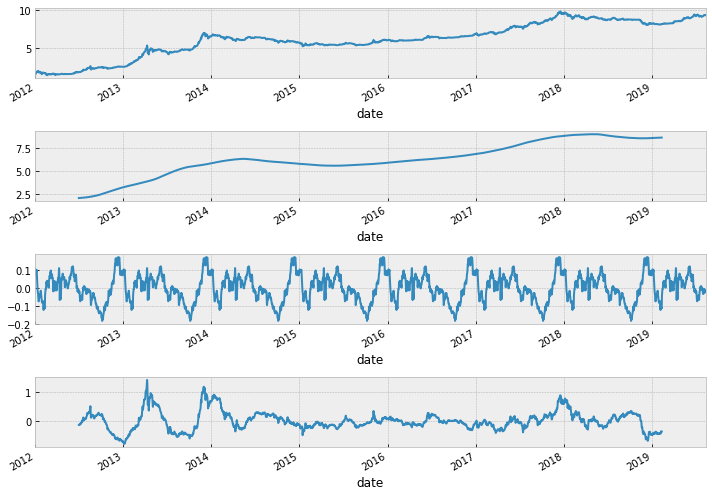

In [20]:
with plt.style.context('bmh'):

    fig = plt.figure(figsize=(10, 7))
    layout = (4, 2)
    plot1 = plt.subplot2grid(layout, (0, 0), colspan=2)
    plot2 = plt.subplot2grid(layout, (1, 0), colspan=2)
    plot3 = plt.subplot2grid(layout, (2, 0), colspan=2)
    plot4 = plt.subplot2grid(layout, (3, 0), colspan=2)
      
    
    decomposition.observed.plot(ax=plot1)
#     (decomposition.observed.mean()*daily.weighted_price[develop_mask]/daily.weighted_price[develop_mask].max()).plot(ax=plot1, color='blue')
    decomposition.trend.plot(ax=plot2)
    decomposition.seasonal.plot(ax=plot3)
    decomposition.resid.plot(ax=plot4)
    
    
    plt.tight_layout()

## Modelling

### Simplest Models

#### No change  (      y_t = y_(t-1)    < == >    log(y_t/y_(t-1) ) = 0    ) 

_This models error is acutally equivalent to standard deviation of the log returns_

In [49]:
print("log_ret = 0 ==> train set error \n"+str(np.sqrt(np.mean((daily_df[masks['train']]['daily_log_rets'].values)**2)).round(4)))
print("log_ret = 0 ==> valid set error \n"+str(np.sqrt(np.mean((daily_df[masks['valid']]['daily_log_rets'])**2)).round(4)))

log_ret = 0 ==> train set error 
0.0439
log_ret = 0 ==> valid set error 
0.0435


#### log ret  = mean(log ret in train)

In [50]:
mean_log_ret = daily_df[train_mask]['daily_log_rets'].mean()
print("log_ret = mean ==> train set error \n"+str(np.sqrt(np.mean((mean_log_ret-daily_df[masks['train']]['daily_log_rets'].values)**2)).round(5)))
print("log_ret = mean ==> valid set error \n"+str(np.sqrt(np.mean((mean_log_ret-daily_df[masks['valid']]['daily_log_rets'].values)**2)).round(5)))

log_ret = mean ==> train set error 
0.04381
log_ret = mean ==> valid set error 
0.04319


#### Exponential Smoothing

In [52]:
## Tune the alpha parameter

train_er = []
val_er = []

max_ = 50
for i in range(1, max_-1):
    alpha = 0.01/(max_)*i
    daily_df['daily_log_rets_exp_sm'] = exp_smooth(daily_df['daily_log_rets'], alpha=alpha)
    train_er.append(np.sqrt(np.mean((daily_df[train_mask]['daily_log_rets_exp_sm']-daily_df[masks['train']]['daily_log_rets'].values)**2)))
    val_er.append(np.sqrt(np.mean((daily_df[val_mask]['daily_log_rets_exp_sm']-daily_df[masks['valid']]['daily_log_rets'].values)**2)))

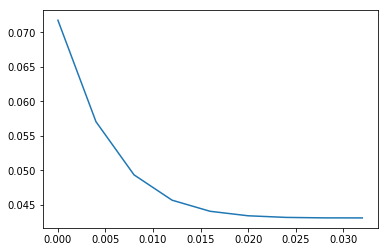

In [56]:
k=9

# plt.plot(range(0, k), train_er[:k])
plt.plot([i*0.2/max_ for i in range(0, k)], val_er[:k])

In [76]:
daily_df['daily_log_rets_exp_sm'] = exp_smooth(daily_df['daily_log_rets'], alpha=0.026)

In [77]:
print("train set error \n"+str(np.sqrt(np.mean((daily_df[train_mask]['daily_log_rets_exp_sm']-daily_df[masks['train']]['daily_log_rets'].values)**2)).round(5)))
print("valid set error \n"+str(np.sqrt(np.mean((daily_df[val_mask]['daily_log_rets_exp_sm']-daily_df[masks['valid']]['daily_log_rets'].values)**2)).round(5)))

train set error 
0.04376
valid set error 
0.04329


### Rolling means

In [28]:
for window_len in [1,2, 3,7, 30, 60, 100, 365]:
    daily_df['vwa_pr'+str(window_len)+'rm'] = daily_df['vwa_pr'].rolling(window=window_len).mean().shift()
    


train set error 
18.3926
valid set error 
383.087
train set error 
21.9171
valid set error 
452.4288
train set error 
24.6933
valid set error 
516.5774
train set error 
33.7637
valid set error 
710.3099
train set error 
72.0723
valid set error 
1501.1786
train set error 
98.4256
valid set error 
2117.4224


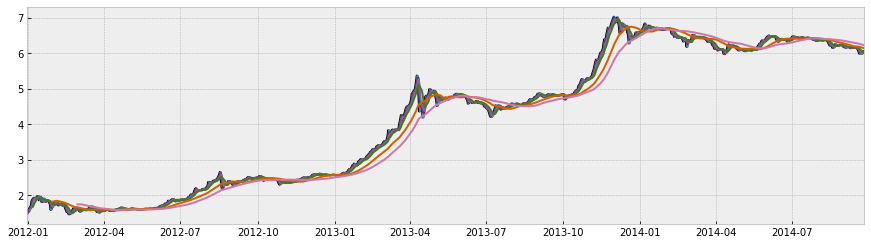

In [30]:
plt.figure(figsize=(15,4))
k=1000

with plt.style.context('bmh'):
    plt.plot(daily_df['vwa_pr'].apply(np.log)[:k], color='black')
    for window_len in [1,2, 3,7,30, 60]:
        print_rmse(df=daily_df, 
                   col_pred_real='vwa_pr', 
                   col_pred='vwa_pr'+str(window_len)+'rm',
                   masks=masks)
        plt.plot(daily_df['vwa_pr'+str(window_len)+'rm'].apply(np.log)[:k])
    plt.xlim(daily_df.index[:k][0], daily_df.index[:k][-1])


In [496]:
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import matplotlib.pyplot as plt
%matplotlib inline

In [497]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

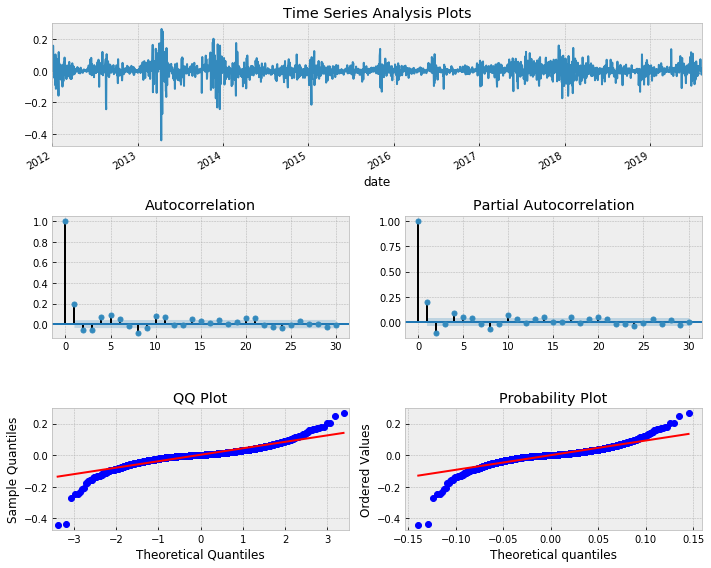

In [498]:
tsplot(daily_df['lr_vwa_pr'].dropna(), lags=30)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/s

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/s

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/s

aic: -5901.51 | order: (4, 0, 3)


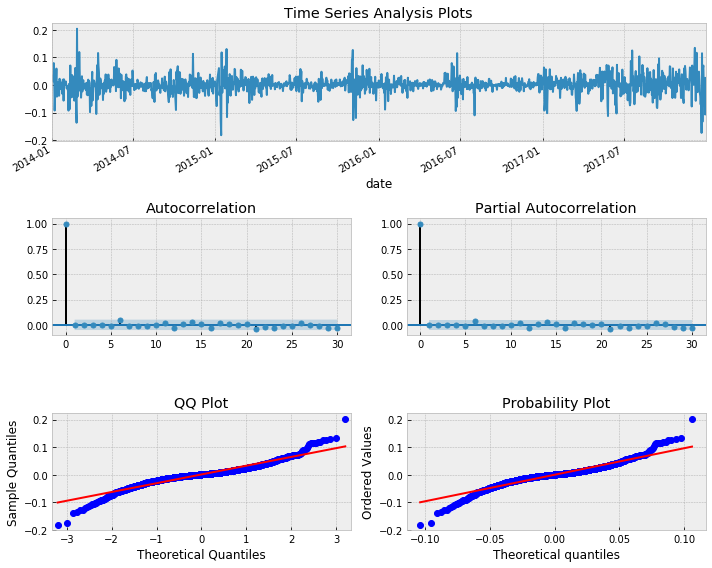

In [499]:
# Fit ARIMA(p, d, q) model to SPX log returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(daily_df[train_mask]['lr_vwa_pr'], 
                          order=(i,d,j)).fit(method='mle',
                          trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))

# ARIMA model resid plot
_ = tsplot(best_mdl.resid, lags=30)

In [503]:
# np.sqrt(((best_mdl.predict() - daily_df[train_mask]['daily_log_rets'])**2).mean())
np.sqrt(((best_mdl.forecast(val_mask.sum())[0] - daily_df[masks['val']]['lr_vwa_pr'])**2).mean())




0.03910332301185886

In [504]:
np.sqrt(((daily_df[masks['tr']]['lr_vwa_pr'].mean() - daily_df[masks['val']]['lr_vwa_pr'])**2).mean())

0.03796688500259988

In [250]:
best_mdl.maparams

array([-0.42148928,  0.10084001,  0.32309632,  0.21183976])

### Feature Generating

#### Technical Indicators

In [7]:
from ta import *

In [8]:
daily_df = add_all_ta_features(df=daily_df, close='close',
                              open='open', high='high', low='low', volume='vol_cur')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ta/trend.py:170: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (dip_mio[i]/trs[i])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ta/trend.py:174: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (din_mio[i]/trs[i])


In [9]:
cols_na = daily_df.isna().sum()[daily_df.isna().mean()>0].index.values
for col in cols_na:
    ave= daily_df[col].mean()
    daily_df[col].fillna(ave, inplace=True)

In [10]:
daily_df[cols_na].isna().sum()

lr_vwa_pr               0
volume_obv              0
volume_fi               0
volume_em               0
trend_macd              0
trend_macd_signal       0
trend_macd_diff         0
trend_ema_fast          0
trend_ema_slow          0
trend_vortex_ind_pos    0
trend_vortex_ind_neg    0
trend_vortex_diff       0
trend_trix              0
trend_cci               0
momentum_rsi            0
momentum_mfi            0
momentum_kama           0
others_dlr              0
dtype: int64

In [11]:
# daily_df['daily_we_pr'+'_X_'+'vol_cur'] = daily_df['daily_we_pr'] * daily_df['daily_vol_cur']

# for window_len in [3,7, 30, 60, 100]:
#     daily_df['daily_we_pr_'+str(window_len)+'r_vw_m'] = (daily_df['daily_we_pr'+'_X_'+'vol_cur'].rolling(window=window_len).sum() - daily_df['daily_we_pr'+'_X_'+'vol_cur']) / (daily_df['daily_vol_cur'].rolling(window=window_len).sum() - daily_df['daily_vol_cur'])



# def rollingvolwe_mean(df, averaged_col, weight_col):
#     df[averaged_col+'_X_'+weight_col] = df[averaged_col]*df[weight_col]
#     rm = []
#     for t in df.index:
#         mask = df.index <= t
#         val = df[mask][averaged_col+'_X_'+weight_col].sum()/df[mask][weight_col].sum()
#         rm.append(val)
#     return pd.Series(index=df.index,data=rm)


In [12]:
# dif = (daily_df['daily_we_pr_'+str(window_len)+'r_vw_m']/daily_df['daily_we_pr_'+str(window_len)+'r_vw_m'].shift()).apply(np.log)[val_mask] - daily_df[train_mask]['daily_log_rets']
# np.sqrt(np.mean(dif**2))
# dif
# daily_df[train_mask]['daily_log_rets']
# for window_len in [3,7, 30, 60, 100]:
#     daily_df['daily_log_rets_'+str(window_len)+'r_vw_m'] = (daily_df['lr_vwe_pr'+str(window_len)+'r_vw_m']/daily_df['daily_we_pr_'+str(window_len)+'r_vw_m'].shift()).apply(np.log)


# np.sqrt(np.mean(dif**2))


#### Genetic Algorithm to search for input features and Reservoir Parameters

In [144]:

from GA import esn, evolution

In [145]:
evolution = evolution(df=daily_df, 
                      masks=masks, 
                      population_size=20, 
                      indiviudal_size=daily_df.shape[1])

In [146]:
evolution.evolve()


 Genereation:  1
roulette wheel
elite selection: 1
population before selecting elite: 20
population after selecting elite: 19
elite selection: 2
population before selecting elite: 19
population after selecting elite: 18
Population after one generation:  4


IndexError: list index out of range

In [ ]:
daily_df['vol']

In [505]:
import random

target_signal_tr = daily_df[train_mask]['lr_vwa_pr'][1:]
target_signal_val = daily_df[val_mask]['lr_vwa_pr'][1:]
target_signal_te = daily_df[test_mask]['lr_vwa_pr'][1:]

target_signals = {}
target_signals['tr'] = target_signal_tr
target_signals['val'] = target_signal_val
target_signals['te'] = target_signal_te

# for div, signal in target_signals.items():
#     target_signals[div] = signal.apply(np.std)


    
feats = ['vol_cur', 'vol_btc', 'low', 'vwa_low', 'lr_vwa_pr',
       'count_non_na_mins', 'volume_em', 'volume_nvi', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kchi',
       'volatility_dcli', 'trend_macd', 'trend_adx_pos',
       'trend_vortex_ind_neg', 'trend_trix', 'trend_kst',
       'trend_ichimoku_a', 'trend_visual_ichimoku_a',
       'trend_visual_ichimoku_b', 'trend_aroon_up', 'trend_aroon_down',
       'trend_aroon_ind', 'momentum_rsi', 'momentum_mfi', 'momentum_tsi',
       'momentum_kama', 'others_dr']

# feats = [daily_df.columns[i]]
# feats= []

# Normalization of input signals
# input_signal_tr = ((daily_df[feats][train_mask]-daily_df[train_mask][feats].mean())/daily_df[train_mask][feats].std())[:-1]
# input_signal_val = ((daily_df[feats][val_mask]-daily_df[train_mask][feats].mean())/daily_df[train_mask][feats].std())[:-1]
# input_signal_te = ((daily_df[feats][test_mask]-daily_df[train_mask][feats].mean())/daily_df[train_mask][feats].std())[:-1]

# daily_df['daily_vol_cur']


input_signals = {}
input_signals['tr'] = daily_df[feats][train_mask][:-1]
input_signals['val'] = daily_df[feats][val_mask][:-1]
input_signals['te'] = daily_df[feats][test_mask][:-1]

for name, df in input_signals.items():
    df['bias'] = 1

input_signals['tr'].apply(['mean', 'std'])

# i+=1

,vol_cur,vol_btc,low,vwa_low,lr_vwa_pr,count_non_na_mins,volume_em,volume_nvi,volatility_kcc,volatility_kch,...,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,momentum_rsi,momentum_mfi,momentum_tsi,momentum_kama,others_dr,bias
mean,1.845880e+07,11824.933412,1264.075189,1316.879313,0.001987,1101.511325,0.000058,43890.374870,1278.34633,1377.927562,...,930.861898,52.606726,38.528483,14.078243,54.390148,54.317395,7.612782,1307.623783,0.270458,1.0
std,4.842819e+07,10874.811788,2313.233381,2457.730108,0.032879,217.294525,0.000398,27465.963909,2345.46514,2616.311675,...,1214.722626,35.901801,33.425465,62.137537,14.161930,17.646350,18.172639,2427.338610,3.870500,0.0


In [506]:
import pyESN

esn = pyESN.ESN(n_inputs = input_signals['tr'].shape[1],
          n_outputs = 1,
          n_reservoir = 1,
          sparsity=0.9,
          spectral_radius = 1,

          input_scaling=True,
          teacher_forcing=True,
          random_state=42)


train_preds = esn.fit(input_signals['tr'].values, target_signal_tr.values)
print("train error: \n"+str(np.sqrt(np.mean((train_preds.flatten() - target_signal_tr.values)**2)).round(5)))

prediction = esn.predict(inputs=input_signals['val'].values)
print("test          \nvalid error: \n"+str(np.sqrt(np.mean((prediction.flatten() - target_signal_val.values)**2)).round(5)))
print("y = y_t-1 valid error: \n"+str(np.sqrt(np.mean((target_signal_val.shift()-target_signal_val)**2)).round(5)))
print("y = mean(y^tr) valid error: \n"+str(np.sqrt(np.mean((target_signal_val.values)**2)).round(5)))

train error: 
0.0
test          
valid error: 
0.0
y = y_t-1 valid error: 
0.0
y = mean(y^tr) valid error: 
0.0


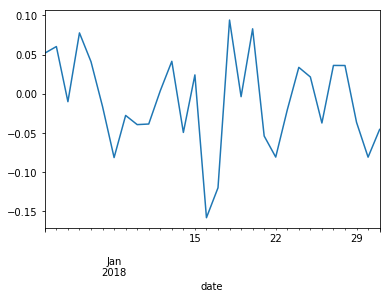

In [493]:
(target_signal_val).plot()




In [406]:
10-0.07968/target_signal_val.std()

8.154381907077063

In [88]:
target_signal_val.std()

0.04317252865342765

In [103]:
# Are the time indexes of signals correct? ( input = 1,2,3 ,... , N-1  ,  output =  2,3,4 , ... , N )

for part in ['tr', 'val', 'te']:
    
    input_signal = input_signals[part]
    target_signal = target_signals[part]
    a=set(input_signal.index).difference(set(target_signal.index))==set([input_signal.index[0]]) and set(target_signal.index).difference(set(input_signal.index))==set([target_signal.index[-1]])
    print(a)


True
True
True


## PyESN

In [291]:
# ## BEST SO FAR LOL


# import pyESN

# esn = pyESN.ESN(n_inputs = input_signals['tr'].shape[1],
#           n_outputs = 1,
#           n_reservoir = 1,
#           sparsity=0.1,
#           spectral_radius = 0.001,
#           noise=10,
#           input_scaling=True,
#           teacher_forcing=True,
#           random_state=42)


# train_preds = esn.fit(input_signals['tr'].values, target_signal_tr.values)
# print("train error: \n"+str(np.sqrt(np.mean((train_preds.flatten() - target_signal_tr.values)**2)).round(5)))

# prediction = esn.predict(inputs=input_signals['val'].values)
# print("test          \nvalid error: \n"+str(np.sqrt(np.mean((prediction.flatten() - target_signal_val.values)**2)).round(5)))
# print("y = 1 valid error: \n"+str(np.sqrt(np.mean((target_signal_val.values)**2)).round(5)))
# print("y = mean(y^tr) valid error: \n"+str(np.sqrt(np.mean((daily_df['daily_log_rets'][train_mask].mean() - target_signal_val.values)**2)).round(5)))

train error: 
0.04229
test          
valid error: 
0.04322
y = 1 valid error: 
0.04351
y = mean(y^tr) valid error: 
0.04322


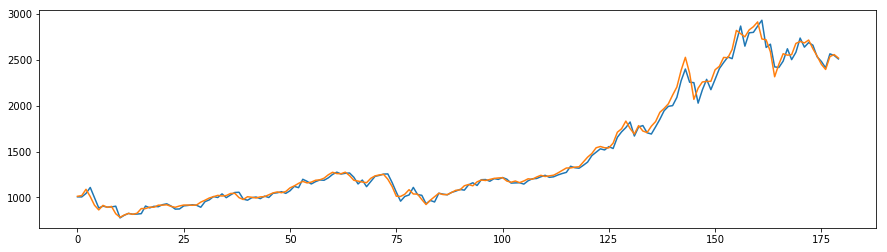

In [47]:
plt.figure(figsize=(15,4))
k=180
plt.plot(range(k), prediction[:k])
plt.plot(range(k), target_signal_val[:k])
# plt.plot(range(k), target_signal_val[:k].shift())

In [97]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# # define model

# n_steps = 


# model = Sequential()
# model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
# # model.add(LSTM(50, activation='relu'))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')


# # model = tf.keras.Sequential()
# # model.add(tf.keras.layers.Input(input_shape=input_signal_tr.shape[1]))
# # model.add(tf.keras.layers.LSTM(50, return_sequences=True ))
# # model.add(tf.keras.layers.Dense(1, activation=None))
# # model.compile(optimizer='adam')

# input_ = input_signals['tr'].values.reshape(input_signals['tr'].values.shape[0],input_signals['tr'].values.shape[1])
# model.fit(input_, target_signals['tr'].values)

In [178]:


# plt.figure(figsize=(20,5))
# # plt.bar(range(len(target_signal_tr)+1 , len(target_signal)-1),target_signal_val,label="target system")
# plt.bar(range(len(target_signal_tr)+1 , len(target_signal)-1),prediction, label="free running ESN")
# # lo,hi = plt.ylim()
# # plt.plot([len(target_signal_tr),len(target_signal_tr)],[lo+np.spacing(1),hi-np.spacing(1)],'k:')

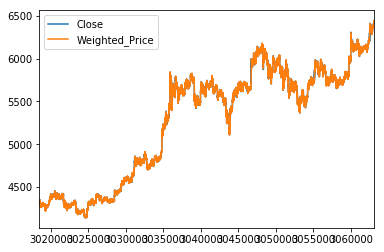

In [110]:
data[data['time_month'] == 201710][['Close', 'Weighted_Price']][:].plot()

## Targets

#### Daily returns on weighted Price

In [12]:
daily.returns = Struct()
daily.returns.we_pr = (daily.weighted_price/daily.weighted_price.shift()).apply(np.log)

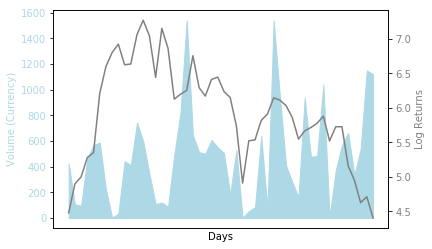

In [34]:
count = data.groupby('date')['Close'].count()

# alpha = 0.1

# daily.volume_btc.cumsum()
volume = daily.volume_cur[:50]


fig, ax1 = plt.subplots()

# Create some mock data
t = volume.index[:50]
data1 = volume.values[:50]
data2 = (daily.weighted_close.values)[:50]

ax1.set_xlabel('Days')
ax1.set_ylabel('Volume (Currency)', color='lightblue')
ax1.fill_between(t, 0, data1, color='lightblue' )
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.tick_params(axis='x', rotation=90, size=0.01)
# ax1.set_ylim(0, 500)

ax2 = ax1.twinx()


ax2.set_ylabel('Log Returns', color='grey')  # we already handled the x-label with ax1
ax2.plot(t, data2, color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
# ax2.set_ylim(0, 2)


plt.xticks([x for x in volume.index if str(x)[-2:]=='01'], 
           [str(x)[:7] for x in volume.index if str(x)[-2:]=='01'])

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [176]:
import pyESN

esn = pyESN.ESN(n_inputs = input_signals['tr'].shape[1],
          n_outputs = 1,
          n_reservoir = 20,
                sparsity=0.5,
          spectral_radius = 0.1,
                noise=1,
          input_scaling=True,
          teacher_forcing=True,
          random_state=42)


train_preds = esn.fit(input_signals['tr'].values, target_signal_tr.values)
print("train error: \n"+str(np.sqrt(np.mean((train_preds.flatten() - target_signal_tr.values)**2)).round(4)))

prediction = esn.predict(inputs=input_signals['val'].values)
print("test          \nvalid error: \n"+str(np.sqrt(np.mean((prediction.flatten() - target_signal_val.values)**2)).round(4)))
print("y = 0 valid error: \n"+str(np.sqrt(np.mean((target_signal_val.values)**2)).round(4)))
print("y = mean(y^tr) valid error: \n"+str(np.sqrt(np.mean((daily_df['daily_close'][train_mask].mean() - target_signal_val.values)**2)).round(4)))

print("y = y_t-1 valid error: \n"+str(np.sqrt(np.mean((daily_df['daily_close'][val_mask].shift() - target_signal_val)**2)).round(4)))


train error: 
122.1303
test          
valid error: 
6182.9864
y = 0 valid error: 
6524.8341
y = mean(y^tr) valid error: 
6304.4943
y = y_t-1 valid error: 
421.8047


In [106]:
# fix a seed for the reproducibility of results
np.random.seed(7)
  
# Be careful with memory usage
Nr = 100 # number of recurrent units
Nl = 5 # number of recurrent layers
reg = 0.0;
transient = 100
    
deepESN = DeepESN(Nu, Nr, Nl, configs)


NameError: name 'Nu' is not defined